<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221114_SMS_Spam_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/06/12/sms-spam-detection-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [30]:
import pandas as pd
import numpy as np

import io
from google.colab import files

import nltk
import string

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
upload = files.upload()

Saving spam.csv to spam.csv


In [3]:
data = pd.read_csv(io.BytesIO(upload['spam.csv']), encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.columns = ['label', 'sms']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
data.label.value_counts() / data.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [13]:
data.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
data['length'] = data.sms.apply(len)

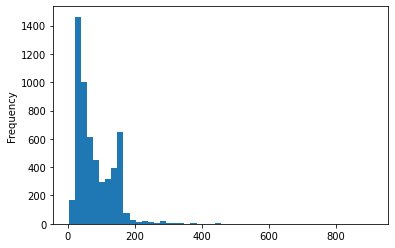

In [15]:
data.length.plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47c4b77150>,
      dtype=object)

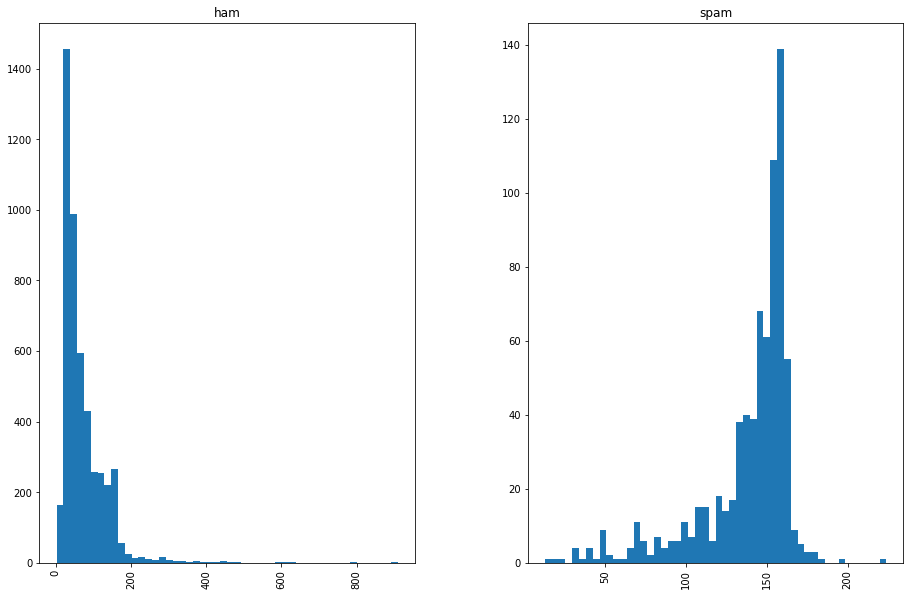

In [16]:
data.hist(column='length', by='label', bins=50, figsize=(15,10))

In [17]:
data['label'] = data['label'].map({'ham':0, 'spam':1})

In [18]:
data.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(data['sms'], data['label'], test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4457,), (1115,), (4457,), (1115,))

In [24]:
cv = CountVectorizer()

In [25]:
training = cv.fit_transform(xtrain)
testing = cv.transform(xtest)

In [27]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [28]:
nb = MultinomialNB()
nb.fit(training, ytrain)

MultinomialNB()

In [29]:
pred = nb.predict(testing)

In [31]:
print('Accuracy score: {}'.format(accuracy_score(ytest, pred)))
print('Precision score: {}'.format(precision_score(ytest, pred)))
print('Recall score: {}'.format(recall_score(ytest, pred)))
print('F1 score: {}'.format(f1_score(ytest, pred)))

Accuracy score: 0.9856502242152466
Precision score: 0.9787234042553191
Recall score: 0.9139072847682119
F1 score: 0.9452054794520547
